# Moving Least Squares Demo

This notebook will demonstrate the features of the Entropic Trajectories framework with respect to 
estimating derivatives of 1d and 2d functions.  We begin by importing the required packages

## Vanilla Least Squares

We will first examine the simpler problem of a Vanilla least squares approach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField
import etraj.etraj as et

In [62]:
# create a random one-dimensional grid
# between -pi and pi.
N = 1000
x = np.random.uniform(-np.pi,np.pi,N)

g = UGrid(x)

<IPython.core.display.Javascript object>


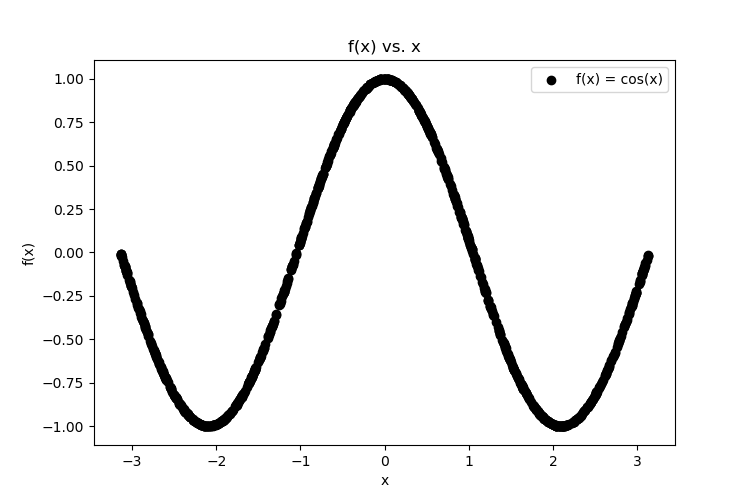

In [63]:
# generate the function values for f(x) = cos(x)
f = np.cos(1.5*x)
# plot the result
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f,color='k',label='f(x) = cos(x)')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


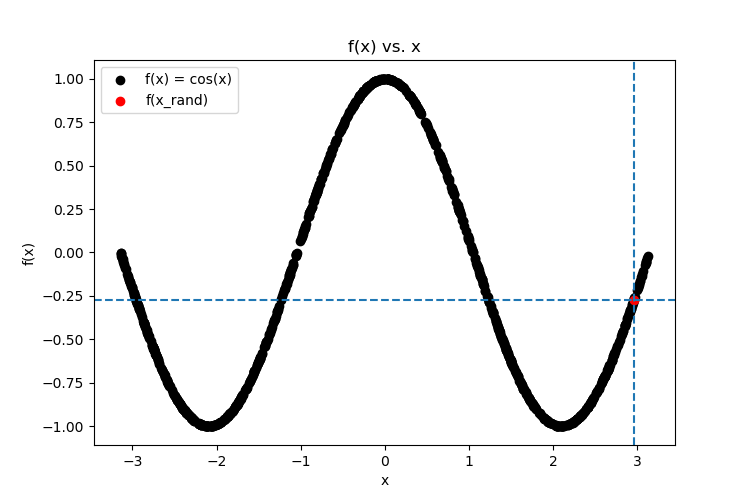

In [55]:
# consider a random point in our grid
i_rand = np.random.randint(len(x))
x_rand, f_rand = x[i_rand], f[i_rand]
# lets plot that point
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f,color='k',label='f(x) = cos(x)')
axs.scatter(x_rand,f_rand,color='r',label='f(x_rand)')
axs.axhline(f_rand,linestyle='--')
axs.axvline(x_rand,linestyle='--')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


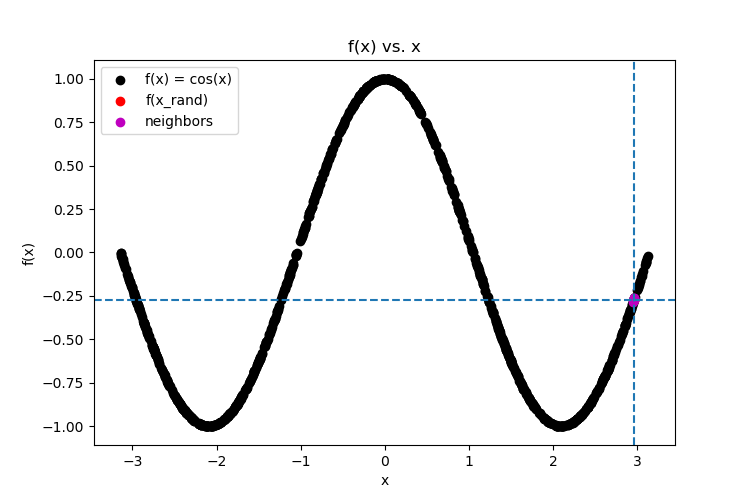

In [56]:
# select a number of nearest neighbors to use for the point
k = 5
g.query_neighbors(k)
# grab the nearest neighbors to the point x_rand
neighbors = g.get_neighbors(i_rand)
x_neighbors = [x[i] for i in neighbors]
f_neighbors = [f[i] for i in neighbors]
# plot the result
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f,color='k',label='f(x) = cos(x)')
axs.scatter(x_rand,f_rand,color='r',label='f(x_rand)')
axs.scatter(x_neighbors,f_neighbors,color='m',label='neighbors')
axs.axhline(f_rand,linestyle='--')
axs.axvline(x_rand,linestyle='--')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

In [57]:
# let's use those neighbors to approximate the derivative
# of f(x) at x_rand.
app = Approximator()
# construct the B matrix for first order in the Taylor expansion
b_matrix = app.construct_taylor_matrix(g,neighbors,i_rand,5)
print(b_matrix)

dim: (5x6), type: double&, name: 'B'
[  1.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00
   1.000e+00   3.215e-03   1.034e-05   3.323e-08   1.068e-10   3.435e-13
   1.000e+00   6.027e-03   3.633e-05   2.189e-07   1.320e-09   7.953e-12
   1.000e+00  -9.191e-03   8.448e-05  -7.765e-07   7.137e-09  -6.560e-11
   1.000e+00   9.290e-03   8.630e-05   8.017e-07   7.448e-09   6.919e-11  ]


In [58]:
# solve the least squares problem Ax = y
# where y is the f_neighbors
# and x are the coefficients
v = Vector(f_neighbors)
f_app = et.dgels(b_matrix,v)
print(f_app)

dim: 6, type: double&
[ -2.729e-01   1.443e+00   3.071e-01  -5.411e-01  -5.700e-02  -5.679e-04  ]


<IPython.core.display.Javascript object>


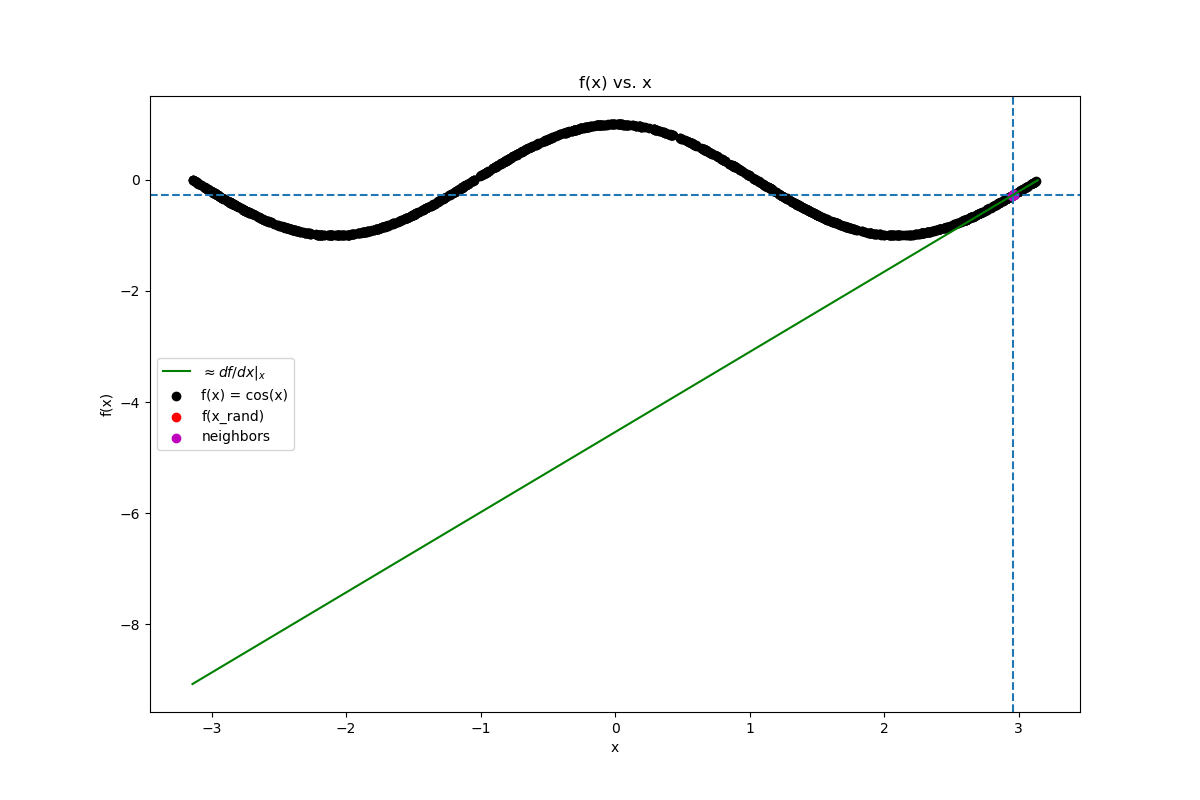

In [59]:
# the first factor is the derivative of f_rand at
# x_rand.
f_0 = -f_app[1]*x_rand + f_app[0]
f_d = f_app[1]
x_lin = np.linspace(-np.pi,np.pi,50)
tangent = f_d*x_lin + f_0
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x,f,color='k',label='f(x) = cos(x)')
axs.scatter(x_rand,f_rand,color='r',label='f(x_rand)')
axs.scatter(x_neighbors,f_neighbors,color='m',label='neighbors')
axs.axhline(f_rand,linestyle='--')
axs.axvline(x_rand,linestyle='--')
axs.plot(x_lin,tangent,color='g',label=r'$\approx df/dx|_{x}$')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


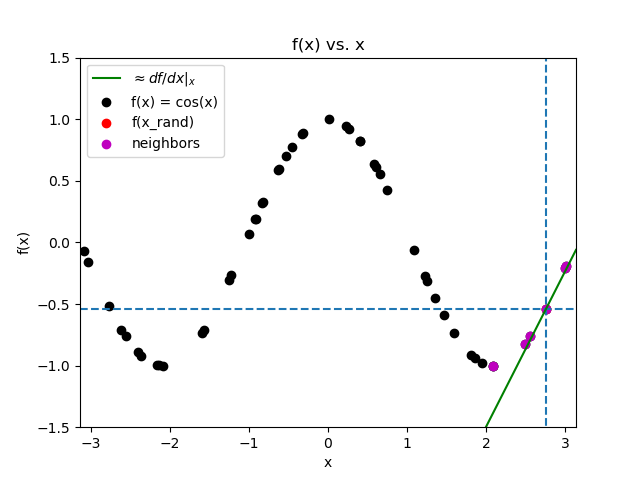

interactive(children=(IntSlider(value=10, description='index', max=49), Output()), _dom_classes=('widget-inter…

In [60]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# create a random one-dimensional grid
# between -pi and pi.
N = 50
x = np.random.uniform(-np.pi,np.pi,N)
x = np.asarray(sorted(x))
g = UGrid(x)
# generate the function values for f(x) = cos(x)
f = np.cos(1.5*x)
k = 6

i_rand = np.random.randint(len(x))
x_rand, f_rand = x[i_rand], f[i_rand]
g.query_neighbors(k)
neighbors = g.get_neighbors(i_rand)
x_neighbors = [x[i] for i in neighbors]
f_neighbors = [f[i] for i in neighbors]
# let's use those neighbors to approximate the derivative
# of f(x) at x_rand.
app = Approximator()
# construct the B matrix for first order in the Taylor expansion
b_matrix = app.construct_taylor_matrix(g,neighbors,i_rand,k)
v = Vector(f_neighbors)
f_app = et.dgelsd(b_matrix,v)
f_0 = -f_app[1]*x_rand + f_app[0]
f_d = f_app[1]
x_lin = np.linspace(-np.pi,np.pi,50)
tangent = f_d*x_lin + f_0


fig, axs = plt.subplots()
line1 = axs.scatter(x,f,color='k',label='f(x) = cos(x)')
line2 = axs.scatter(x_rand,f_rand,color='r',label='f(x_rand)')
line3 = axs.scatter(x_neighbors,f_neighbors,color='m',label='neighbors')
line4 = axs.axhline(f_rand,linestyle='--')
line5 = axs.axvline(x_rand,linestyle='--')
line6, = axs.plot(x_lin,tangent,color='g',label=r'$\approx df/dx|_{x}$')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
axs.set_xlim(-np.pi,np.pi)
axs.set_ylim(-1.5,1.5)
plt.legend()

def update(index = 0):
    neighbors = g.get_neighbors(index)
    x_neighbors = [x[i] for i in neighbors]
    f_neighbors = [f[i] for i in neighbors]
    array = [[x_neighbors[i],f_neighbors[i]] for i in range(len(x_neighbors))]
    b_matrix = app.construct_taylor_matrix(g,neighbors,index,k)
    v = Vector(f_neighbors)
    f_app = et.dgelsd(b_matrix,v)
    f_0 = -f_app[1]*x[index] + f_app[0]
    f_d = f_app[1]
    x_lin = np.linspace(-np.pi,np.pi,50)
    tangent = f_d*x_lin + f_0
    line2.set_offsets((x[index],f[index]))
    line3.set_offsets(np.c_[x_neighbors,f_neighbors])
    line4.set_ydata(f[index])
    line5.set_data(x[index],[-1.5,1.5])
    line6.set_ydata(tangent)
    fig.canvas.draw_idle()

interact(update, index=widgets.IntSlider(min=0, max=N-1, step=1, value=10));

<IPython.core.display.Javascript object>


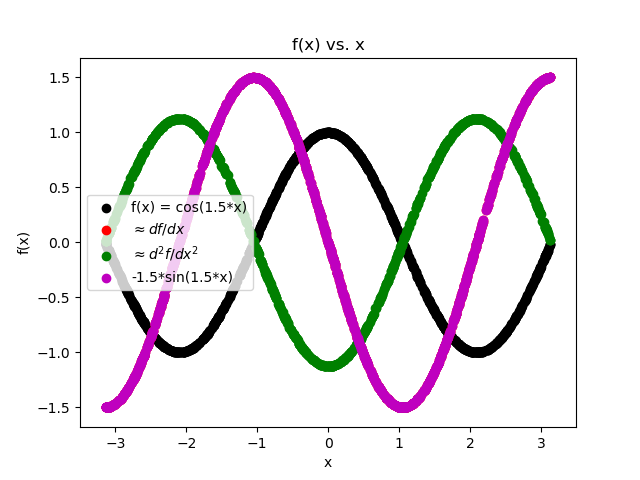

In [65]:
# let's approximate the first and second derivative of the entire function
k = 3
g.query_neighbors(k)
f_der = []
f_derr = []
f_der_true = -1.5*np.sin(1.5*x)
for i in range(len(x)):
    temp_neighbors = g.get_neighbors(i)
    b_matrix = app.construct_taylor_matrix(g,temp_neighbors,i,5)
    x_neighbors = [x[m] for m in temp_neighbors]
    f_neighbors = [f[m] for m in temp_neighbors]
    v = Vector(f_neighbors)
    f_app = et.dgels(b_matrix,v)
    f_der.append(f_app[1])
    f_derr.append(f_app[2])
fig, axs = plt.subplots()
axs.scatter(x,f,color='k',label='f(x) = cos(1.5*x)')
axs.scatter(x,f_der,color='r',label=r'$\approx df/dx$')
axs.scatter(x,f_derr,color='g',label=r'$\approx d^2f/dx^2$')
axs.scatter(x,f_der_true,color='m',label='-1.5*sin(1.5*x)')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


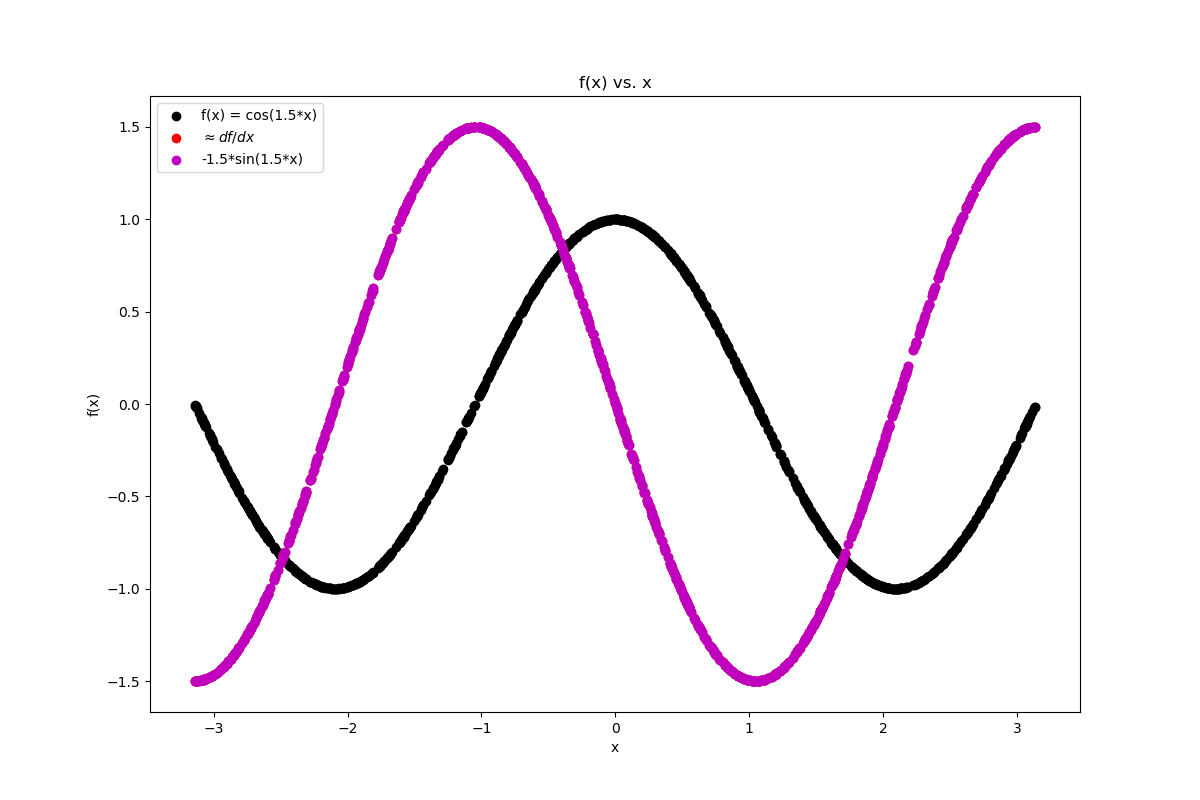

In [67]:
# Computing the gradient of f(x) can be done in a much 
# more compact way by calling ScalarFields gradient function
sfield = ScalarField(g,f,g.get_logger())
grad_sfield = sfield.gradient()
f_der2 = [grad_sfield[i][0] for i in range(len(grad_sfield))]
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x,f,color='k',label='f(x) = cos(1.5*x)')
axs.scatter(x,f_der2,color='r',label=r'$\approx df/dx$')
axs.scatter(x,f_der_true,color='m',label='-1.5*sin(1.5*x)')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


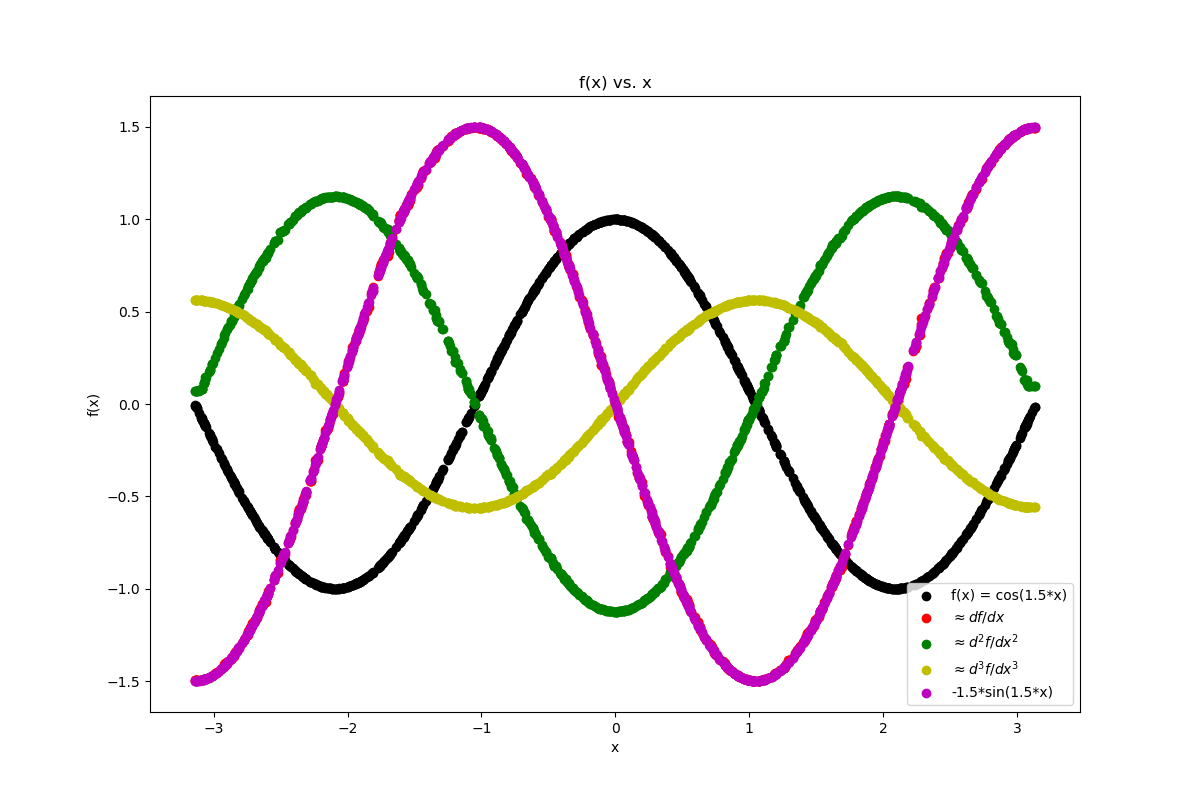

In [68]:
# an even more compact way is to use the derivative function
k = 20
sfield.get_approximator().set_k(k)
#sfield.get_approximator().set_lsdriver("xGELSS")
der_sfield = sfield.derivative(0,1)
der2_sfield = sfield.derivative(0,2)
der3_sfield = sfield.derivative(0,3)
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x,f,color='k',label='f(x) = cos(1.5*x)')
axs.scatter(x,der_sfield,color='r',label=r'$\approx df/dx$')
axs.scatter(x,der2_sfield,color='g',label=r'$\approx d^2f/dx^2$')
axs.scatter(x,der3_sfield,color='y',label=r'$\approx d^3f/dx^3$')
axs.scatter(x,f_der_true,color='m',label='-1.5*sin(1.5*x)')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

## Moving Least Squares

In [71]:
# create a random one-dimensional grid
# between -pi and pi.
N = 500
x = np.random.uniform(-np.pi,np.pi,N)

g = UGrid(x)

<IPython.core.display.Javascript object>


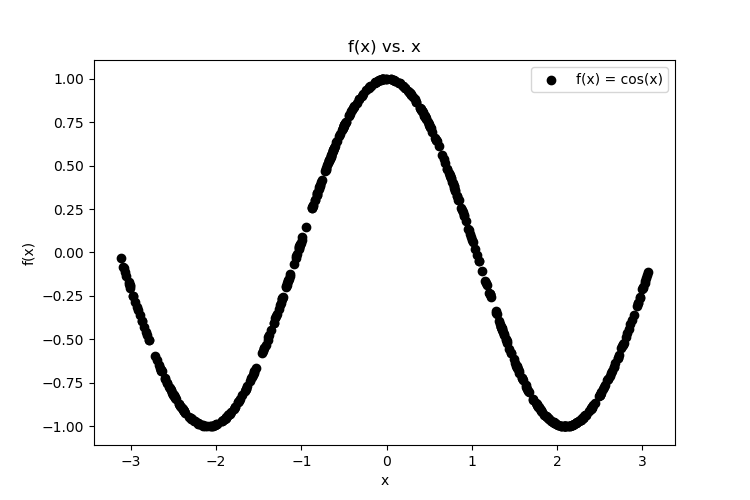

In [72]:
# generate the function values for f(x) = cos(x)
f = np.cos(1.5*x)
sfield = ScalarField(g,f,g.get_logger())
# plot the result
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f,color='k',label='f(x) = cos(x)')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()


Approximator type: Weighted moving least squares
Approximator parameters - k = 5
                          n = 3


<IPython.core.display.Javascript object>


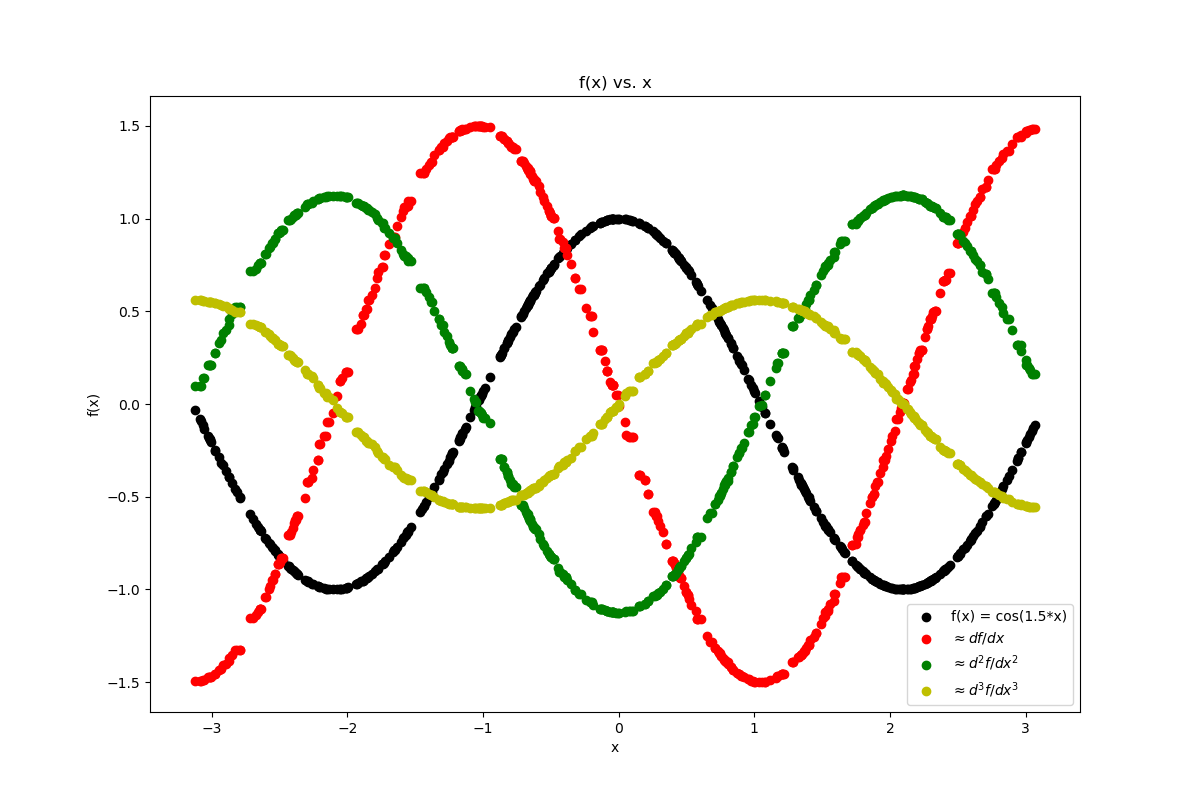

In [76]:
# an even more compact way is to use the derivative function
k = 5
sfield.get_approximator().set_k(k)
sfield.set_approx_type('WMLS')
sfield.get_approximator().set_lsdriver("xGELSS")
print(sfield.get_approximator())

der_sfield = sfield.derivative(0,1)
der2_sfield = sfield.derivative(0,2)
der3_sfield = sfield.derivative(0,3)
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x,f,color='k',label='f(x) = cos(1.5*x)')
axs.scatter(x,der_sfield,color='r',label=r'$\approx df/dx$')
axs.scatter(x,der2_sfield,color='g',label=r'$\approx d^2f/dx^2$')
axs.scatter(x,der3_sfield,color='y',label=r'$\approx d^3f/dx^3$')
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


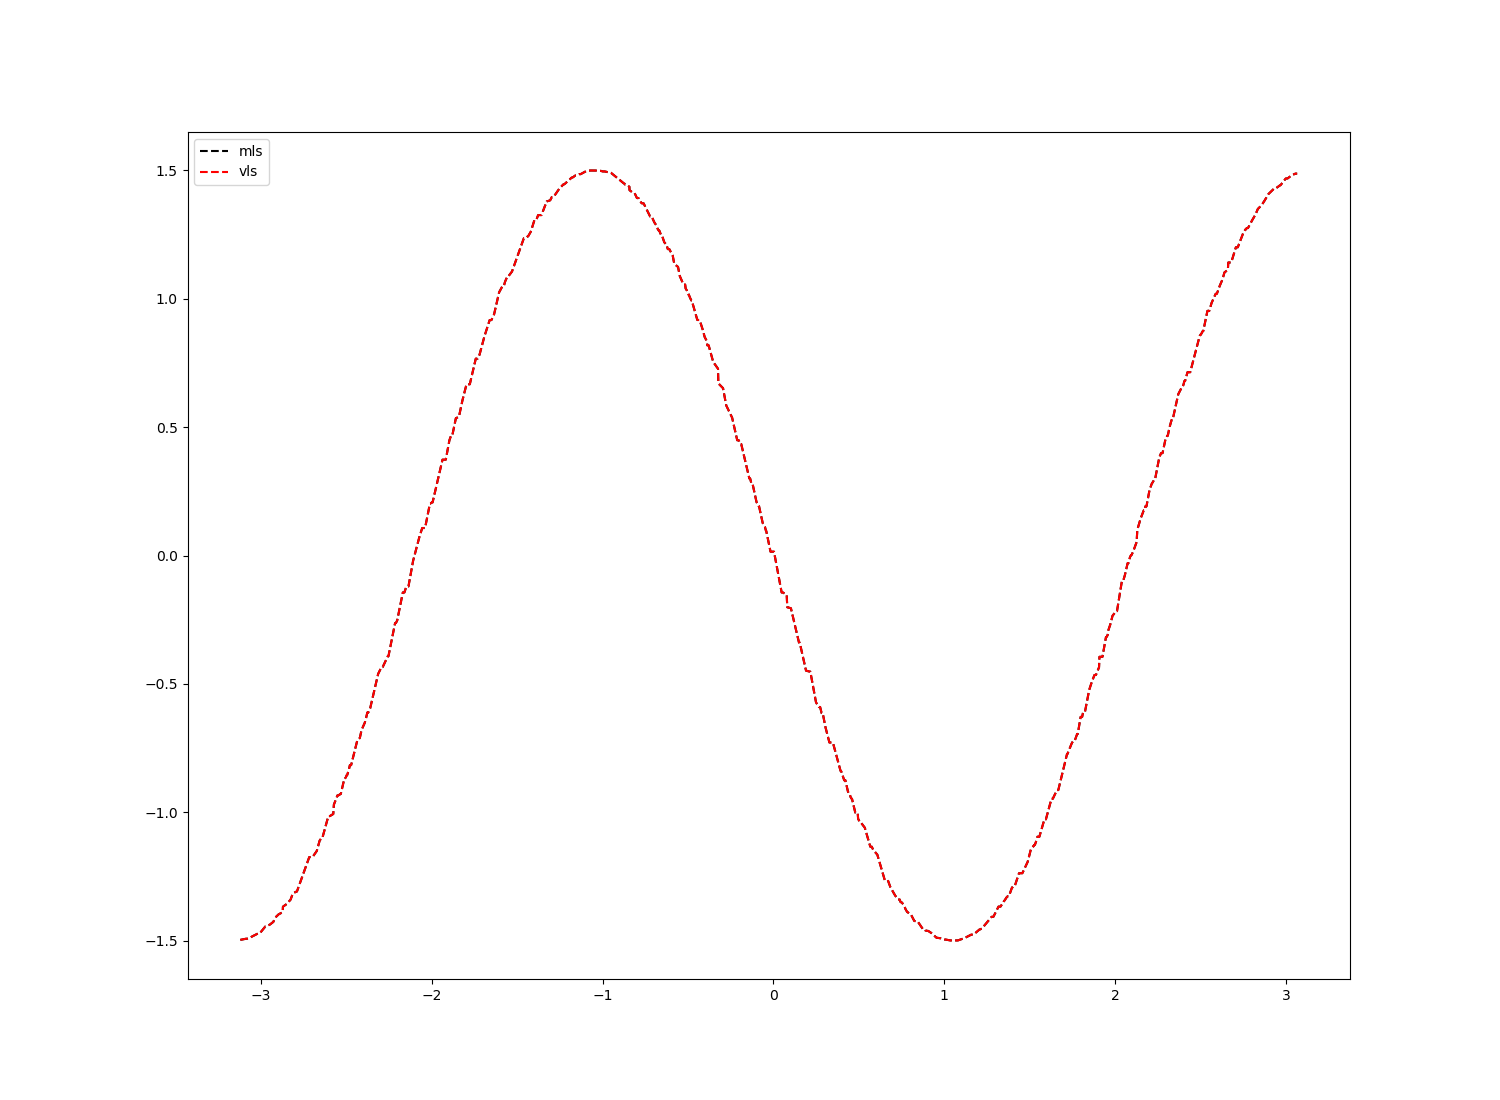

<IPython.core.display.Javascript object>


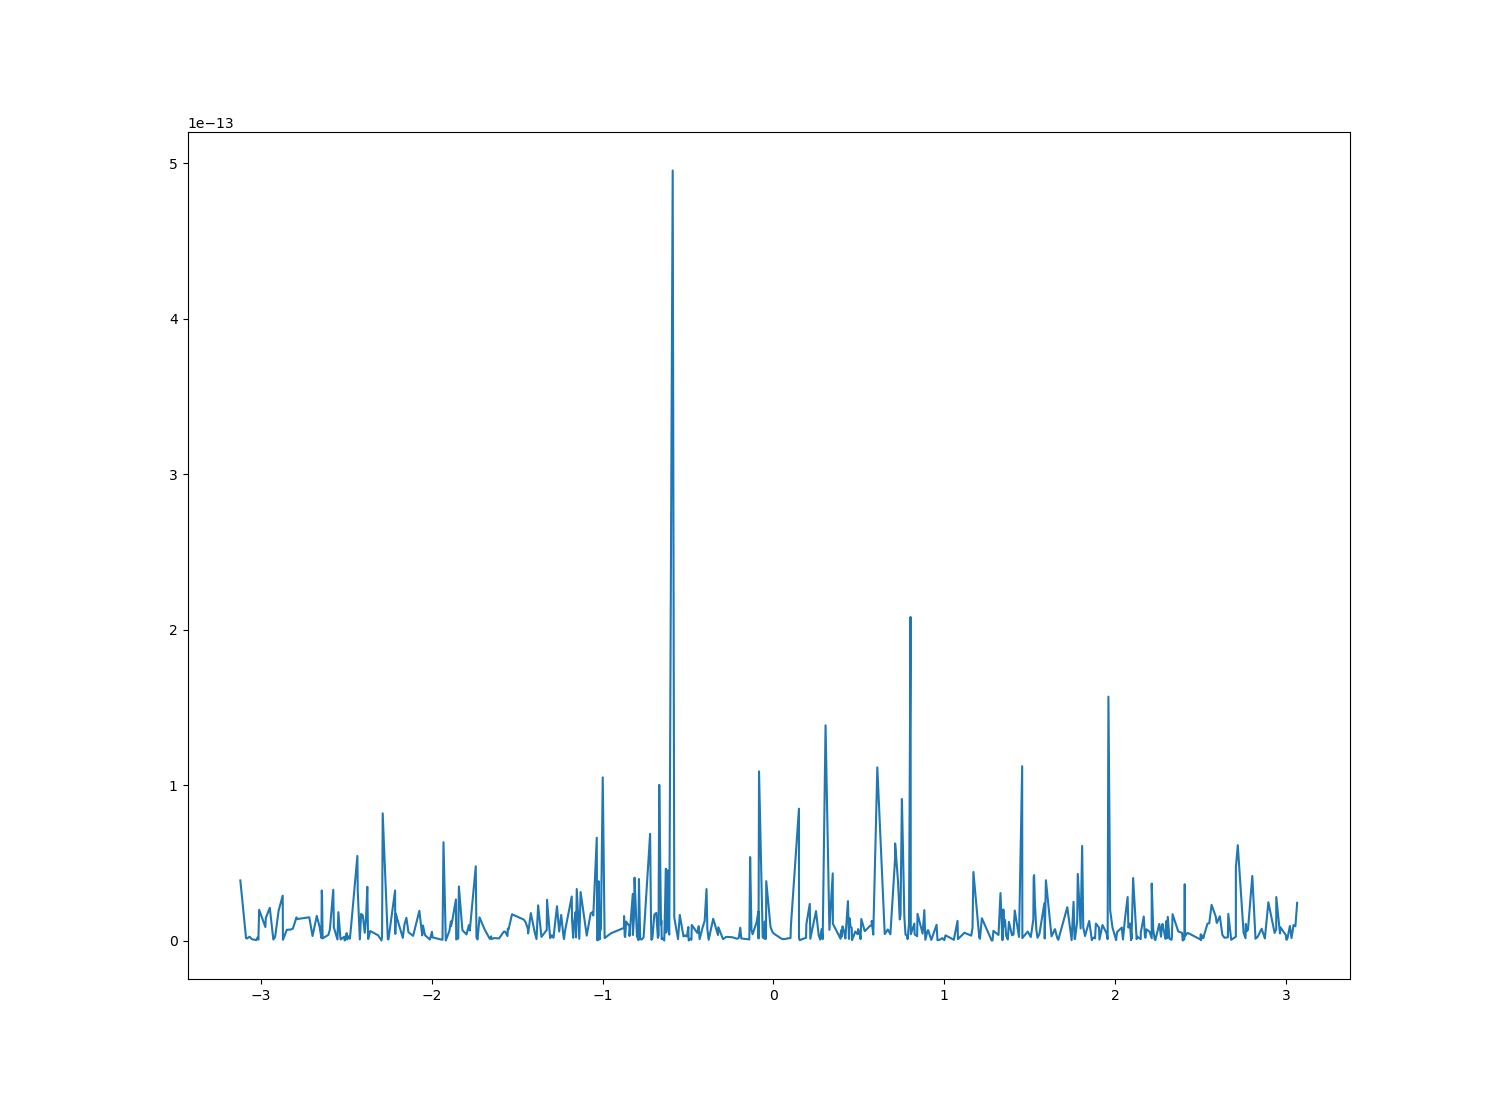

In [74]:
# comparison of LS and MLS methods
k = 3
sfield.get_approximator().set_k(k)

# first compute using MLS
sfield.set_approx_type('MLS')
der_mls = sfield.derivative(0,1)

# now compute using LS
sfield.set_approx_type('LS')
der_ls = sfield.derivative(0,1)

der_sort_mls = sorted([[x[i],der_mls[i]] for i in range(len(x))],key=lambda x:x[0])
der_sort_ls = sorted([[x[i],der_ls[i]] for i in range(len(x))],key=lambda x:x[0])
x_sort = [der_sort_mls[i][0] for i in range(len(x))]
der_sort_mls = [der_sort_mls[i][1] for i in range(len(x))]
der_sort_ls = [der_sort_ls[i][1] for i in range(len(x))]
                                                  
#find the absolute difference
diff = np.abs(np.asarray(der_ls) - np.asarray(der_mls))
fig, axs = plt.subplots(figsize=(15,11))
axs.plot(x_sort,der_sort_mls,color='k',label='mls',linestyle='--')
axs.plot(x_sort,der_sort_ls,color='r',label='vls',linestyle='--')
plt.legend()

fig2, axs2 = plt.subplots(figsize=(15,11))
axs2.plot(x_sort,diff)
plt.show()


Approximator type: Weighted moving least squares
Approximator parameters - k = 3
                          n = 3


<IPython.core.display.Javascript object>


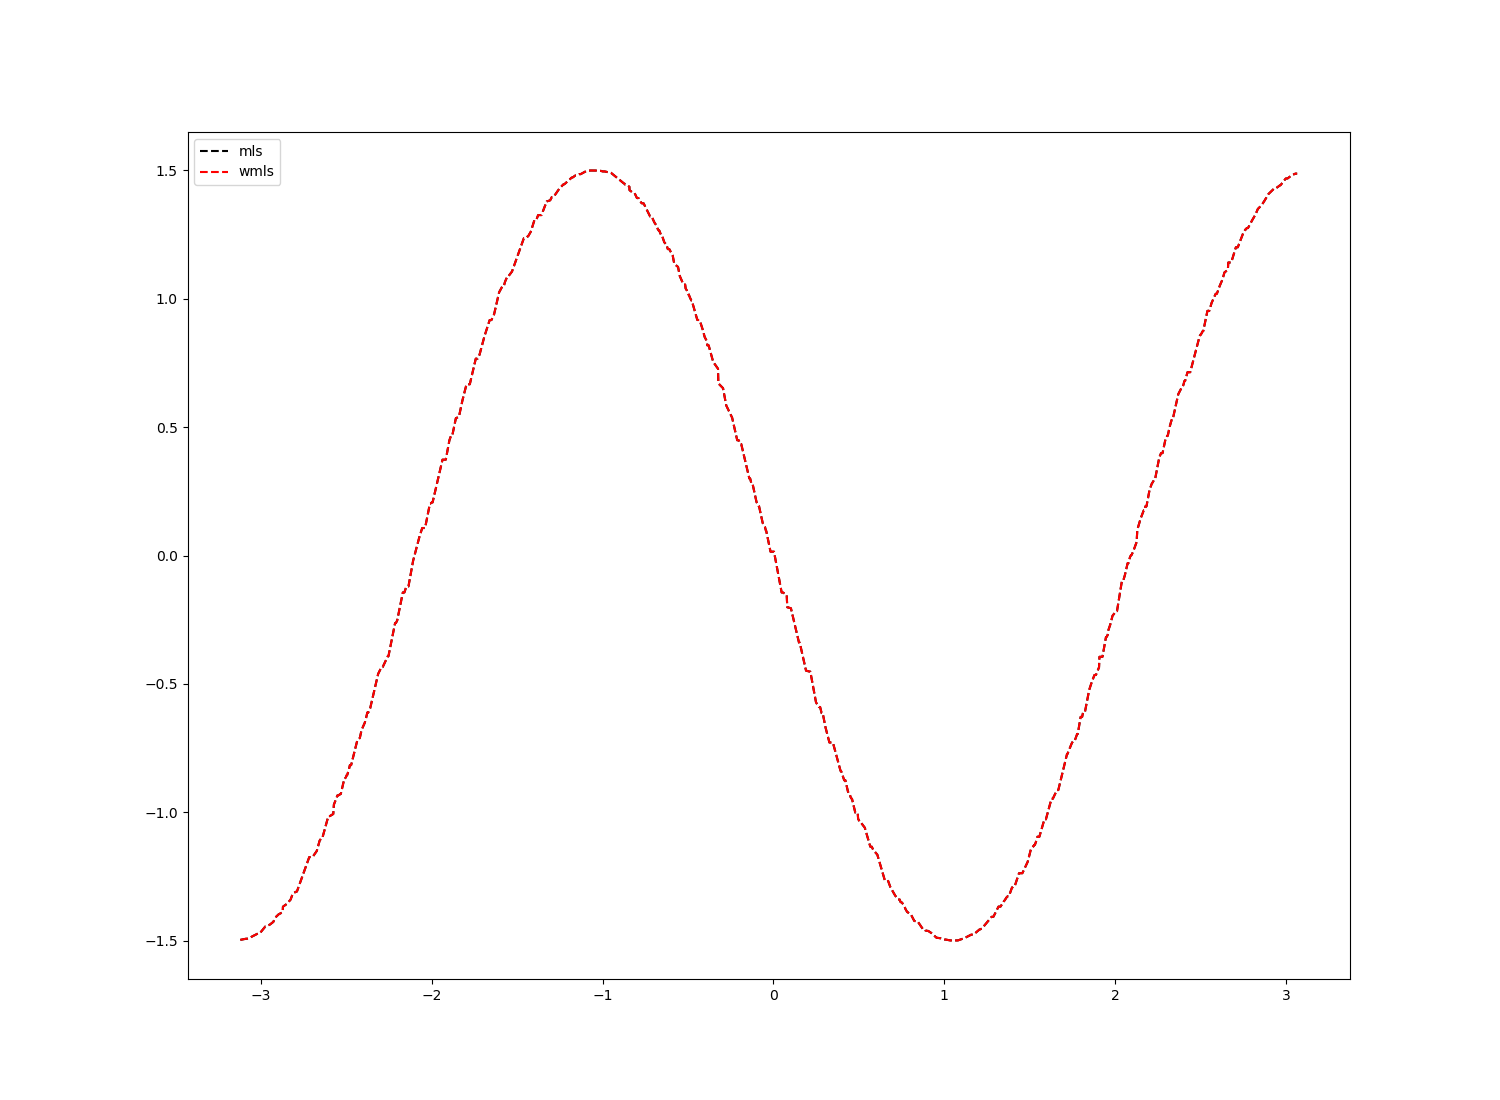

<IPython.core.display.Javascript object>


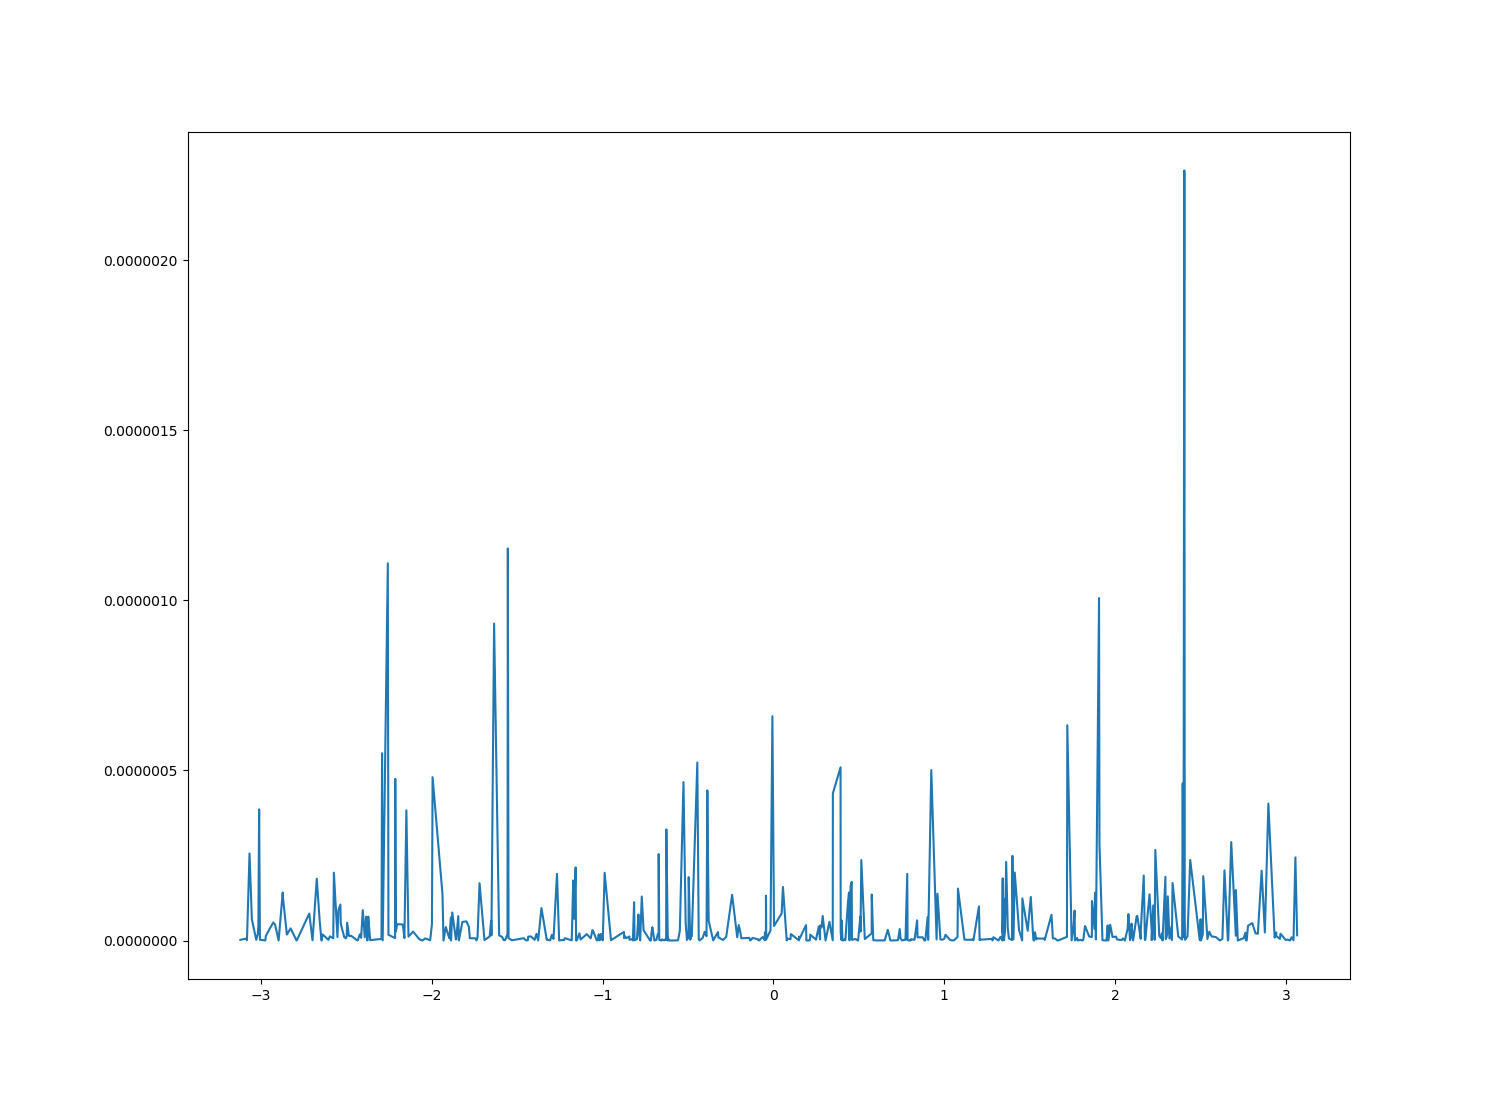

In [75]:
# comparison of WMLS and MLS methods
k = 3
sfield.get_approximator().set_k(k)

# first compute using MLS
sfield.set_approx_type('MLS')
der_mls = sfield.derivative(0,1)

# now compute using LS
sfield.set_approx_type('WMLS')
der_ls = sfield.derivative(0,1)
print(sfield.get_approximator())

der_sort_mls = sorted([[x[i],der_mls[i]] for i in range(len(x))],key=lambda x:x[0])
der_sort_ls = sorted([[x[i],der_ls[i]] for i in range(len(x))],key=lambda x:x[0])
x_sort = [der_sort_mls[i][0] for i in range(len(x))]
der_sort_mls = [der_sort_mls[i][1] for i in range(len(x))]
der_sort_ls = [der_sort_ls[i][1] for i in range(len(x))]
                                                  
#find the absolute difference
diff = np.abs(np.asarray(der_ls) - np.asarray(der_mls))
fig, axs = plt.subplots(figsize=(15,11))
axs.plot(x_sort,der_sort_mls,color='k',label='mls',linestyle='--')
axs.plot(x_sort,der_sort_ls,color='r',label='wmls',linestyle='--')
plt.legend()

fig2, axs2 = plt.subplots(figsize=(15,11))
axs2.plot(x_sort,diff)
plt.show()